In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [383]:
def default_pars( **kwargs):
    pars = {}
    
    pars['kpm']    =  0.6  #Rate at which the non-specific local response (M) eliminates pathogen
    pars['kmp']    = 0.01  # Rate at which the non-specific local response is exhausted by pathogen (P)
    
    pars['sm']    = 0.005 #Source of non-specific local response
    pars['um']    = 0.002 #Decay rate for the non-specific local response

#     pars['kpg']    = 0 #0.5#0.026 #0.025#0.024#0.06#0.021 #various 0.021–2.44; The growth rate of pathogen
    pars['Pinf']    = 20*np.power(10,6)   # Maximum pathogen population
    pars['P_init']  = 0.39#0.18#0.175#0.17
    
    pars['kpn']    = 1.8 #Rate at which activated phagocytes (N*) consume pathogen
    pars['knp']    = 0.1 # Activation of resting phagocytes (NR) by pathogen
    pars['knn']    = 0.01 # Activation of resting phagocytes by previously activated phagocytes and their cytokines
    
    pars['snr']    = 0.08 #Source of resting phagocytes
    
    pars['unr']    = 0.12 #Decay rate of resting phagocytes    
    pars['un']    = 0.05 #Decay rate of activated phagocytes
    
    pars['Cinf']    = 0.28 # Controls the strength of the antiinflammatory mediator (CA)
    pars['Ca']    = 0.2 #
    ### simulation parameters ###
    pars['T'] = 40. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars    
    

In [385]:
def run_sepsis_model(pars,kpg):
    
    # Set parameters
    sm, um = pars['sm'],pars['um']
    kpm,kmp = pars['kpm'],pars['kmp']
    
#     kpg = pars['kpg']
    Pinf = pars['Pinf']
    
    P_init = pars['P_init']
    
    kpn = pars['kpn']    
    knp = pars['knp']    
    knn = pars['knn']    
    
    snr = pars['snr']    
    
    unr = pars['unr']      
    un = pars['un']   
    
    Cinf = pars['Cinf']      
    Ca = pars['Ca']     
    
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    # Initialize 
    P = np.zeros(Lt) # pathogen levels
    M = np.zeros(Lt) # non-specific local response levels
    
    Nact = np.zeros(Lt)
    dNact = np.zeros(Lt)
    dP = np.zeros(Lt)
    
    R1 = np.zeros(Lt) # 
    P[0] = P_init        
    M[0]= sm / (um + kmp*P[0])
    
    Nact_init = 0
    Nact[0] = Nact_init
    R1[0] = knn* Nact[0] + knp*P[0]
    
    for it in range(Lt-1):
        #calculate the increment
        M[it]= sm / (um + kmp*P[it])  #For simplicity, they assumed that the local response reaches quasi-steady state
        #dP =  -kpm * M[it] *  P[it] * dt
#         dP = (kpg*P[it]*(1-(P[it]/Pinf)) - kpm * M[it] *  P[it]) * dt  # Adding a logistic growth term
        
        dP[it] = (kpg*P[it]*(1-(P[it]/Pinf)) - kpm * M[it] *  P[it] - kpn*Nact[it]*P[it]) * dt  # Adding a logistic growth term
        
        R1[it] = knn* Nact[it] + knp*P[it]
        R1[it] = R1[it] /(1+np.power(Ca/Cinf,2))
        dNact[it] = (snr*R1[it]/(unr+R1[it]) - un*Nact[it]) *dt
       
        #update
        P[it+1] = P[it] + dP[it] 
        Nact[it+1] = Nact[it] + dNact[it]
        Nact[it+1] = Nact[it+1] /(1+np.power(Ca/Cinf,2))
#         print(P)
    return P, M,Nact, R1

In [353]:
pars = default_pars()
P,M, Nact,R1 =run_sepsis_model(pars)

In [357]:
# pars

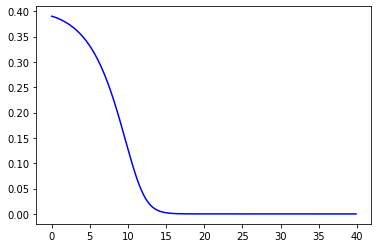

In [354]:
plt.plot(pars['range_t'], P, 'b')

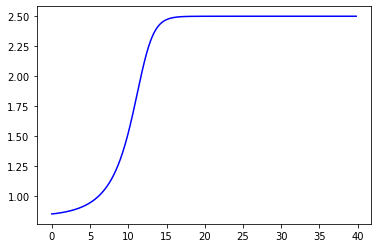

In [355]:
plt.plot(pars['range_t'][0:-1], M[0:-1], 'b')

In [351]:
# plt.plot(pars['range_t'], Nact, 'b')

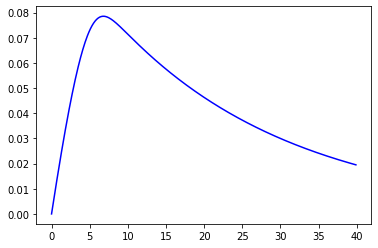

In [338]:
plt.plot(pars['range_t'], Nact, 'b')

In [350]:
# plt.plot(pars['range_t'], R1, 'b')

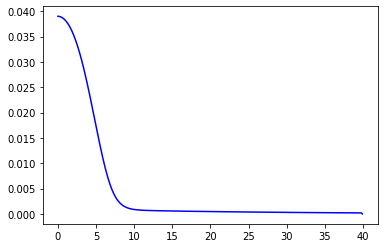

In [337]:
plt.plot(pars['range_t'], R1, 'b')

In [278]:
20*np.power(10,6)

20000000

In [421]:
#bifurcation diagram
def bifurcation_kpg(pars):
    
        # Set parameters
    sm, um = pars['sm'],pars['um']
    kpm,kmp = pars['kpm'],pars['kmp']
    
#     kpg = pars['kpg']
    Pinf = pars['Pinf']
    P_init = pars['P_init']
    
    kpn = pars['kpn']    
    knp = pars['knp']    
    knn = pars['knn']    
    
    snr = pars['snr']    
    
    unr = pars['unr']      
    un = pars['un']   
    
    Cinf = pars['Cinf']      
    Ca = pars['Ca']     
    kpg_append=[]
    dNact_append = []
    
    kpg=1.2
    P_init=0
    for i in range(0,100):
#         kpg=0.1+kpg

        P =P_init + i * 0.01        
        M= sm / (um + kmp*P)

        Nact_init = 0
        Nact = Nact_init

#         M= sm / (um + kmp*P)  #For simplicity, they assumed that the local response reaches quasi-steady state
#         #dP =  -kpm * M[it] *  P[it] * dt
#     #         dP = (kpg*P[it]*(1-(P[it]/Pinf)) - kpm * M[it] *  P[it]) * dt  # Adding a logistic growth term

#         dP = (kpg*P*(1-(P/Pinf)) - kpm * M *  P - kpn*Nact*P)  # Adding a logistic growth term

#         P = P +dP
        R1 = knn* Nact + knp*P
        R1 = R1 /(1+np.power(Ca/Cinf,2))
        dNact = (snr*R1/(unr+R1) - un*Nact)     
        kpg_append.append(P)
        dNact_append.append(dNact)
    return(kpg_append,dNact_append)

In [422]:
kpg,dNact=bifurcation_kpg(pars)

In [423]:
# dNact

In [424]:

# kpg=0
# kpg_append=[]
# Nact_append = []

# # pars['kpg']    = 0.1

# for i in range(0,35):
#     pars = default_pars()

#     kpg    = kpg + 0.1
#     P,M, Nact,R1 =run_sepsis_model(pars,kpg)
#     kpg_append.append(kpg)
#     Nact_append.append(Nact[-1])    

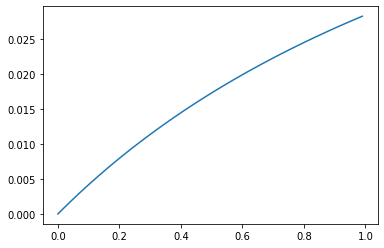

In [425]:
plt.plot(kpg,dNact)